In [2]:
#!pip install pytrends
#!pip install heatmapz
#!pip install pytrends --upgrade

### Libraries
import pandas as pd
import numpy as np
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
from heatmap import heatmap, corrplot

In [3]:
path = 'C:\\Users\\User\\Projects\\working-with-data\\assignment-2-uallende'
directory = path + '\\data\\Google Searches - Copy\\'
os.chdir(path)

In [4]:
## Reading the data
df_ratings = pd.read_csv("data\\ratings.csv")
df_talk_ratings = pd.read_csv("data\\talk_ratings.csv")
df_ted = pd.read_csv("data\\ted.csv")
df_ted_tags = pd.read_csv("data\\ted_tags.csv")

In [5]:
## Convert date formats
df_ted.film_date = pd.to_datetime(df_ted.film_date)
df_ted.published_date = pd.to_datetime(df_ted.published_date)

## Merge talk_ratings with ratings on ID
df_ted_description = pd.merge(df_talk_ratings,
                              df_ratings,
                              on = "id"
                             )

df_ted_description = df_ted_description[["title", "count", "rating"]]

## Create comments to views ratio in df_ted
df_ted = df_ted.assign(comment_to_view_ratio = lambda x: (df_ted.comments/df_ted.views) * 100000)

Text(0, 0.5, 'Occupation')

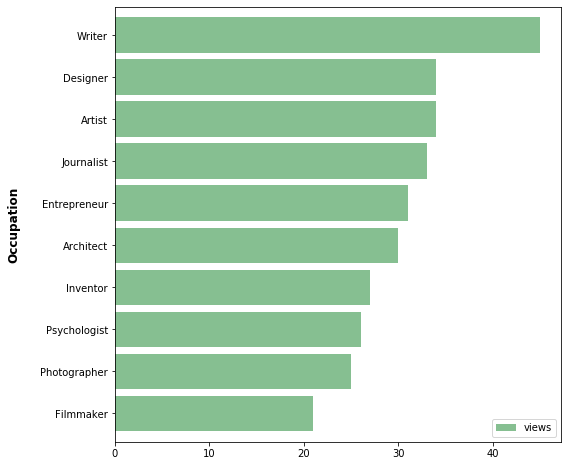

In [6]:
#### EDA - Exploratory Data Analysis

## Occupations of speakers
df_occupation_group = df_ted[['speaker_occupation', 'views']].groupby(['speaker_occupation']).agg(
    'count').sort_values(by = 'views', ascending = False).head(10).reset_index(drop = False)
## plot
ax = df_occupation_group.sort_values(by = 'views').plot(x = 'speaker_occupation', y = 'views',
    kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.85)

ax.set_ylabel("Occupation", labelpad=20, weight='bold', size=12)

Writers is the most represented profession in Ted Talks. For the purpose of the analysis, only the top 10 have been selected.

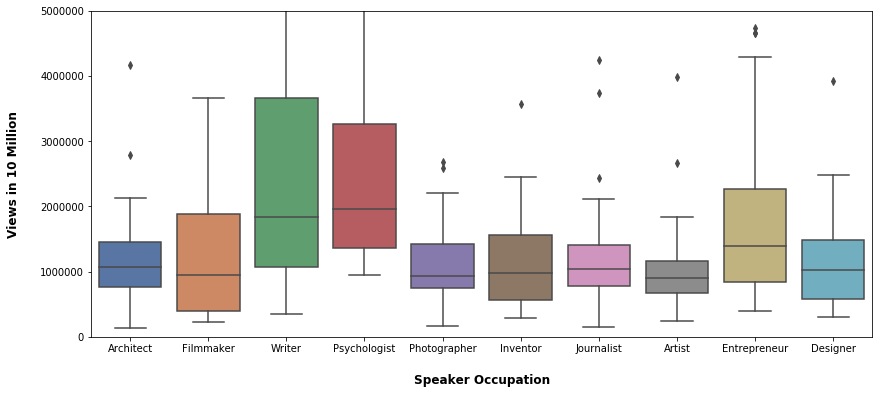

In [7]:
## Occupations with more views
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (14, 6))
sns.boxplot(x = 'speaker_occupation', y= 'views', data = df_ted[df_ted['speaker_occupation'].isin(
    df_occupation_group['speaker_occupation'])], palette="deep", ax =ax)
ax.set_ylabel("Views in 10 Million", labelpad=20, weight='bold', size=12)
ax.set_xlabel("Speaker Occupation", labelpad=20, weight='bold', size=12)
ax.set_ylim([0, 0.5e7])
plt.show()

Most of the top 10 professions achieve around 10 million views on the median. Writers, Psychologists and to a lesser extent Entrepreneurs are above that mark. Also it can be observed that these three have the largest deviations on the upper side, showing a number of extreme values.

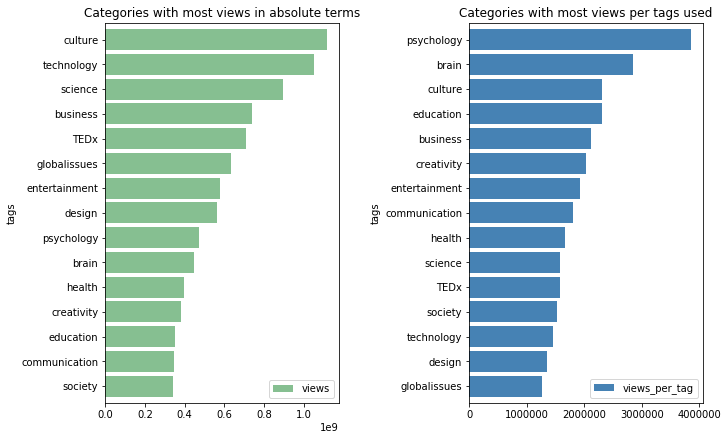

In [8]:
### Tags analysis
# Joining main data frame on 'title' to count views for each tag
df_tags_views = df_ted_tags[['title', 'tags']]
df_tags_views = pd.merge(df_tags_views,
                         df_ted[['title','views']],
                         how =  'left',
                         on = 'title'                         
        )
# Counting number of Talks and the sum of views by title
df_tags_views = df_tags_views.groupby(['tags']).agg(
        {'title': 'count',
         'views': sum}).sort_values(
        by = 'views', ascending = True).reset_index(drop = False)

# Creating a ratio of views per number of tag (to standardise views for those that appear more times)
df_tags_views = df_tags_views.assign(views_per_tag = 
                                     pd.to_numeric(df_tags_views.views)/ pd.to_numeric(df_tags_views.title))

df_tags_views['views_per_tag'] = df_tags_views['views_per_tag'].apply(lambda x: '{:.2f}'.format(x)) # no scientific notation
df_tags_views = df_tags_views[df_tags_views.title > 50] #filtering only tags that have shown at least 50 times (no "lucky winners")
df_tags_views = df_tags_views.sort_values('views', ascending = False).head(15) #top15
df_tags_views.views_per_tag = pd.to_numeric(df_tags_views.views_per_tag) #conversion to numeric

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(40, 40), constrained_layout=True)
# Tags with most views
df_tags_views.sort_values('views', inplace = True) #ordering desc
df_tags_views.plot(x = 'tags', y = 'views', title = "Categories with most views in absolute terms",
                   kind = 'barh', ax = ax1, color='#86bf91', zorder=2, width=0.85)

# Tags with most views standardised (views per tag ratio)
df_tags_views.sort_values('views_per_tag', inplace = True) #ordering desc
df_tags_views.plot(x = 'tags', y = 'views_per_tag', title = "Categories with most views per tags used",
                   kind = 'barh', figsize=(10, 6), ax = ax2, color='#4682B4', zorder=2, width=0.85)

If we were to fund an advertisement capaign we would like to know what tags yield more views on average and not historically. We need to correct the number of views by the count of times Ted Talks have been published. Psychology and Brain tags raise to the top of the most viewed once we control for the number of Ted Talks. Science on the other hand drops significantly. 

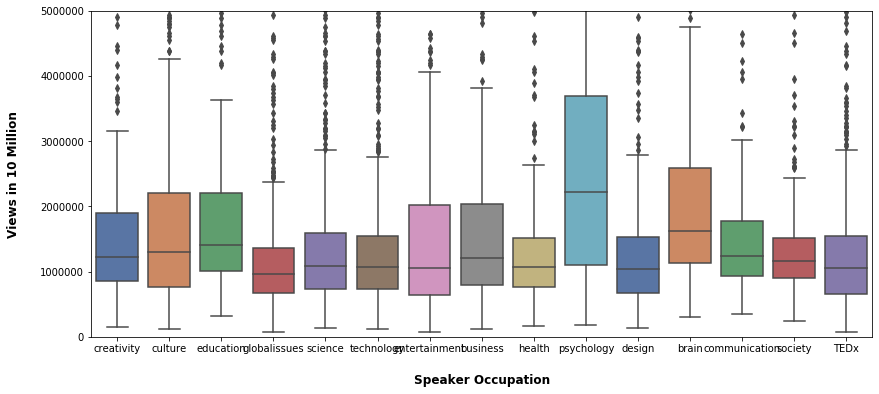

In [9]:
df_tags_views2 = df_ted_tags[['title', 'tags']]
df_tags_views2 = pd.merge(df_tags_views2,
                         df_ted[['title','views']],
                         how =  'left',
                         on = 'title')    

## Tags with more views in absolute terms (another representation)
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (14, 6))
sns.boxplot(x = 'tags', y= 'views', data = df_tags_views2[df_tags_views2['tags'].isin(
    df_tags_views['tags'])], palette="deep", ax = ax)
ax.set_ylabel("Views in 10 Million", labelpad=20, weight='bold', size=12)
ax.set_xlabel("Speaker Occupation", labelpad=20, weight='bold', size=12)
ax.set_ylim([0, 0.5e7])
plt.show()

Psychology Ted Talks are the ones that achieve the most views once we account for views per tag.

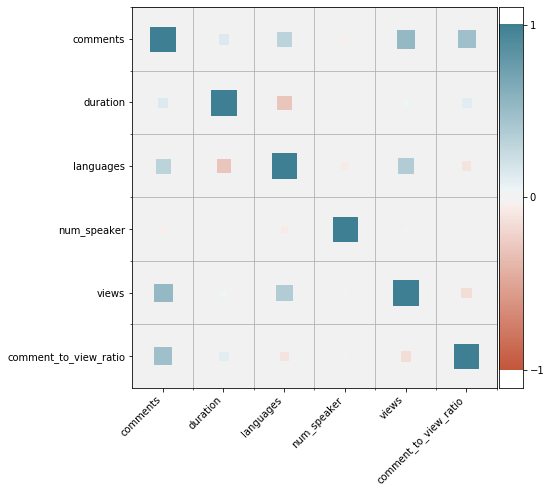

In [10]:
# Run correlation between variables
df_ted_corr_analysis =  df_ted[["comments", "duration", "languages", "num_speaker", "views", "comment_to_view_ratio"]]
corr_matrix  = df_ted_corr_analysis.corr()

plt.figure(figsize = (7, 7))
corrplot(corr_matrix, size_scale = 600)

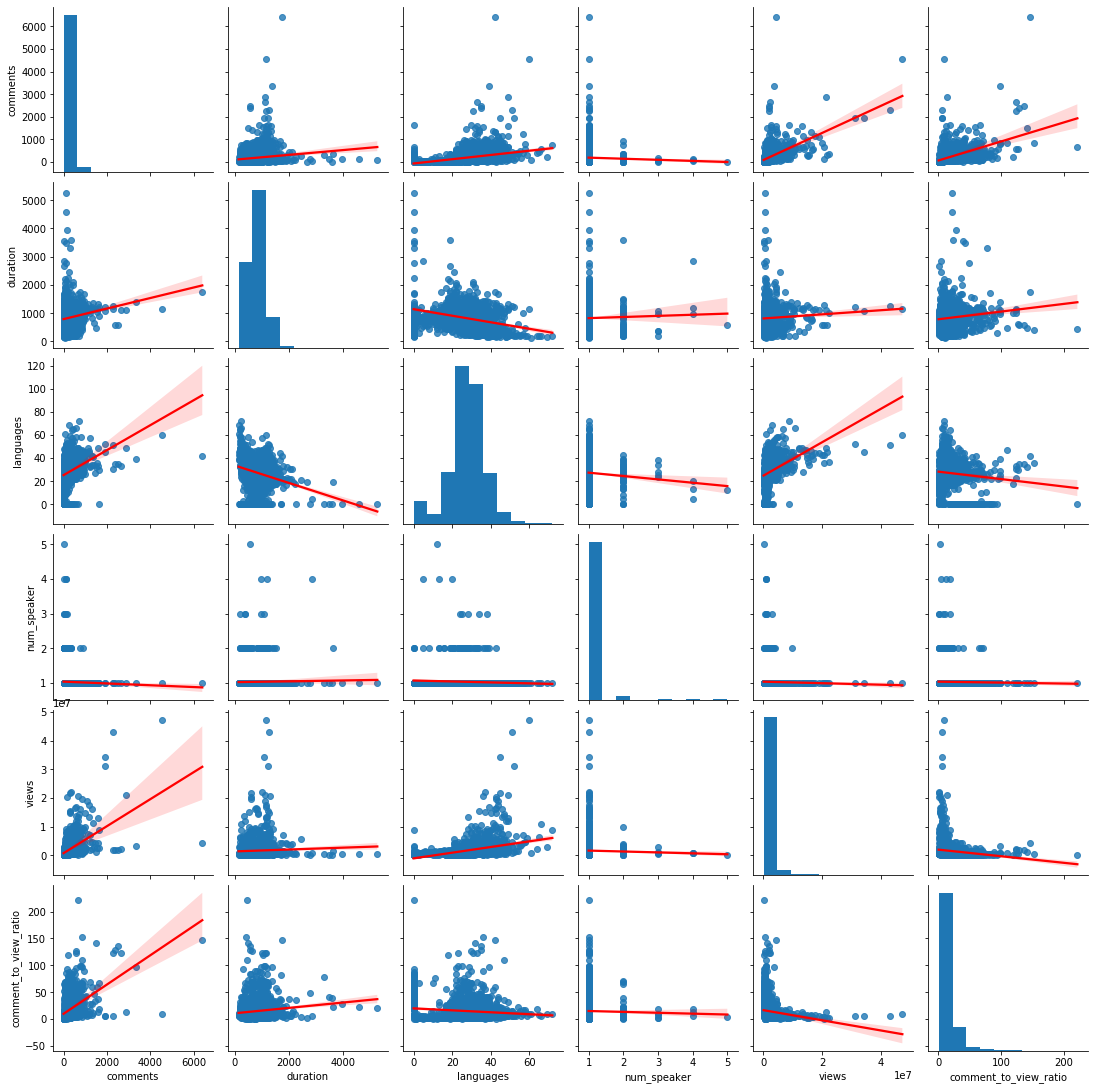

In [11]:
sns.pairplot(df_ted_corr_analysis,  kind="reg", plot_kws={'line_kws':{'color':'red'}}) # 

Under the assumption 'views' is the most sought after output for advertisement. Views is 0.377623 correlated with languages which probably means that more translations into other languages also translate into more visits. 

However, this could possibly be a reverse correlation, by which the more successfull a talk is the more it gets translated to other languages.

No other meaningufl relationship between variables, as for instance the number of comments only follows from the number of visits that a Ted Talk has. Further exploration is required incorporating ratings

Text(0.5, 1.0, 'Distribution density on the tail')

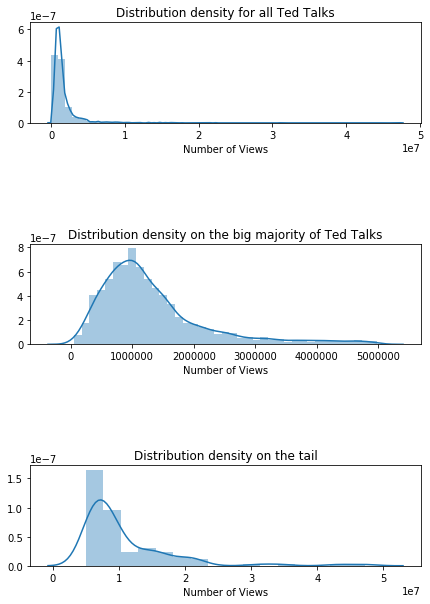

In [12]:
## Disitribution of views
total_views = pd.Series(df_ted["views"], name = "Number of Views")
low_views = pd.Series(df_ted[df_ted['views'] < 0.5e7]['views'], name = "Number of Views")
high_views = pd.Series(df_ted[df_ted['views'] > 0.5e7]['views'], name = "Number of Views")

fig, axs = plt.subplots(figsize = (7,10), nrows = 3)
fig.subplots_adjust(hspace= 1.2, wspace= .15)
sns.distplot(total_views, ax = axs[0]).set_title("Distribution density for all Ted Talks")
sns.distplot(low_views, ax = axs[1]).set_title("Distribution density on the big majority of Ted Talks")
sns.distplot(high_views, ax = axs[2]).set_title("Distribution density on the tail")

As it can be seen, most views are concentrated around 0 - 5 million views. There seems to be an almost complete drop in the number of talks with more than 5 million views

509    0.528786
Name: cumsum, dtype: float64

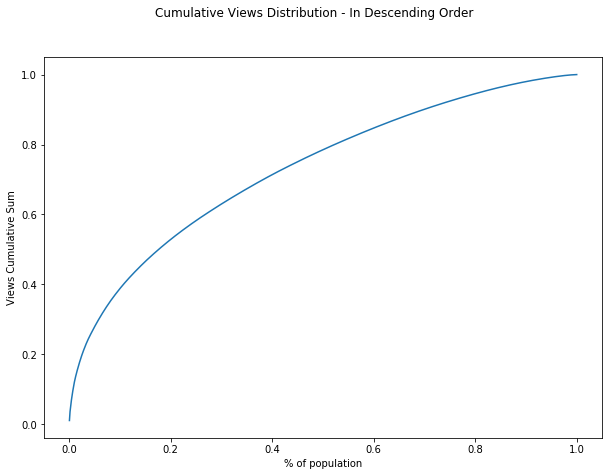

In [13]:
## Pareto chart for views - who seizes most views
df_pareto_views = df_ted[['views']]
df_pareto_views = df_pareto_views.sort_values(by = 'views', ascending = False).reset_index(drop = True) # sort views desc
# adding columns for pareto
df_pareto_views = df_pareto_views.assign(percentage = lambda x: (df_pareto_views.views/df_pareto_views.views.sum()))
df_pareto_views = df_pareto_views.assign(cumsum = lambda x: (df_pareto_views.percentage.cumsum()))
df_pareto_views = df_pareto_views.assign(per_rep = lambda x: (1/len(df_pareto_views)))
df_pareto_views = df_pareto_views.assign(cum_per_rep = lambda x: (df_pareto_views.per_rep.cumsum()))

plt.subplots(figsize = (10,7))
plt.plot(df_pareto_views['cum_per_rep'],df_pareto_views['cumsum'])
plt.xlabel('% of population')
plt.ylabel('Views Cumulative Sum')
plt.suptitle('Cumulative Views Distribution - In Descending Order')

df_pareto_views[round(df_pareto_views['cum_per_rep'], 4) == 0.2]['cumsum']

20% of the Talks produce 52% of the views. This is an interesting finding for our purpose, we would be interested in identifying those Talks that become really popular. 

In [14]:
## Importing search hits from google trends - we will analyse the relationship between popularity and views
# based on https://towardsdatascience.com/telling-stories-with-google-trends-using-pytrends-in-python-a11e5b8a177

from pytrends.request import TrendReq
pytrends = TrendReq(hl= "en-US", tz=360)

path = ''
path = os.getcwd() 

kw_list = df_ted["main_speaker"].values.tolist() #List of speakers
kw_list = list(dict.fromkeys(kw_list)) #Removing duplicates
print(sum(x is None for x in kw_list)) #No NaNs

def gtrends_overtime(i, full_list, key_ref, save_name="", directory="", category=0, time='all', loc=''):
    #iterate every 4 item in list plus a keyword reference as the relative comparison
    while i < len(kw_list):
        l = kw_list[i:(i+4)]
        l.append(key_ref)
        pytrends.build_payload(l, cat=category, timeframe=time, geo=loc, gprop='')
        df_time = pytrends.interest_over_time()
        df_time.reset_index(drop = False, inplace = True)
        df_time_name = "gtrends_overtime"+str(save_name)+str((i+4)//4)+".csv"
        df_time.to_csv(df_time_name, index = False)
        i += 4

0


In [ ]:
### Important : scrapping the information of more than 2000 names will take some time. There should be around 500 files in total
## After 314 The function returns ResponseError: The request failed: Google returned a response with code 429.
## Files The user has sent too many requests in a given amount of time ("rate limiting"). 
## Function has to be called with i = filenumber * 4

#picking it up where google stopped the requests        
os.chdir(directory)       
gtrends_overtime(0, kw_list, 'Iraola', "TedNames", directory,
                 time='all', loc='')

In [16]:
#### Combining all files
# Adding a number to the dummy search for normalisation (every name has to be compared with the dummy of its search group)
os.chdir(directory)  
file_list = []
for file in os.listdir():
    if file.endswith('.csv'):
        df = pd.read_csv(file)
        if int(re.findall(r'[0-9]+', file)[0]) == 1:
            pass
        else:     
            filenumber = str(int(re.findall(r'[0-9]+', file)[0]) - 1)
            df.rename(columns = {'Iraola':'Iraola'+'.'+ filenumber}, inplace = True)     
        df = df.drop(columns = ['isPartial'], axis = 1)
        file_list.append(df)

In [17]:
# Appending all DFs horizontally        
google_trends_results = pd.concat(file_list, axis = 1, ignore_index = False, sort = False)
# Removing duplicated date columns
google_trends_results = google_trends_results.loc[:,~google_trends_results.columns.duplicated()] 
# Removing last two rows (newer searches contain NaNs)
google_trends_results.drop(google_trends_results.tail(2).index,inplace=True) 

In [18]:
def normalise(df, n_file, key_ref):
    z = 0
    li = []
    # Checking the relative popularity between comparisons
    for i in range(n_file-1):    
         # Appending the list if relative popularity of the keyword reference is different
        if df[key_ref+"."+str(i+1)+""][0] == df[key_ref][0]:
            pass
        else:
            li.append(i+1)      
    # Normalizing relative popularity when the relative popularity of the keyword reference is different        
    for l in li:
        k = df.columns.get_loc(key_ref+"."+str(l)+"")
        for n in range(len(df.index)):
            # Computing relative popularity by normalizing according to the reference
            if df.iloc[n,(k)] > 0:
                for m in range(5):
                    df.iloc[n,(k-4+m)] = (df.iloc[n,(k-4+m)] * (df[key_ref][n]/df.iloc[n,(k)]))
            else:
                for m in range(5):
                    df.iloc[n,(k-4+m)] = (df.iloc[n,(k-4+m)] * (df[key_ref][n]/0.01))
    return df

In [19]:
### Important : Normalising the results might take a bit of time (10 min)
# Normalising the popularity of all the speakers
df_google_trends = normalise(google_trends_results, len(file_list), 'Iraola')
df_google_trends = df_google_trends[df_google_trends.columns.drop(list(df_google_trends.filter(regex='Iraola')))]

In [20]:
# Obtaining clean DataFrame for Popularity among speakers
df_popularity = df_google_trends.transpose()
df_popularity.columns = df_popularity.iloc[0]
df_popularity = df_popularity[1:]
df_popularity['mean'] = df_popularity.mean(axis = 1) # creating a mean across all time for popularity
df_popularity.reset_index(drop = False, inplace = True)
df_popularity = df_popularity.rename(columns={'index': 'main_speaker'})

In [21]:
# Preparing the data for correlation - join on popularity and views grouped by main_speaker 
df_pop_corr = df_popularity[['main_speaker', 'mean']]
df_aggviews_speaker = df_ted[['main_speaker', 'views']].groupby(['main_speaker']).agg(
    'sum').sort_values(by = 'views', ascending = False).reset_index(drop = False)

df_pop = pd.merge(df_pop_corr,
                       df_aggviews_speaker,
                       on = 'main_speaker',
                       )

Pearsons correlation: 0.008


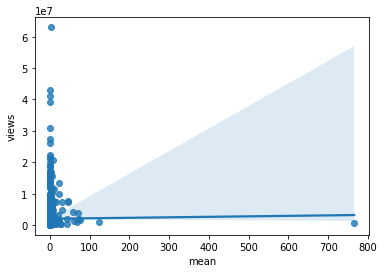

In [22]:
# Merging Popularity to ted DF
from scipy.stats import pearsonr

ax = sns.regplot(x = df_pop['mean'], y = df_pop['views'])
corr, _ = pearsonr(df_pop['mean'], df_pop['views'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.008

Popular people (measured as google search hits) and views are not correlated - hiring famous speakers wouldn't guarantee views and could save a lot of spending in advertisment. Further, all the most watched Ted Talks, above the 10 million views mark, were delivered by the less known people.

Some further analysis can be done on the popularity on the months leading to the Ted Talk.

In [23]:
df_ted_tags = df_ted_tags.rename(columns={'Unnamed: 0': 'id'})

talk_ratings = pd.merge(df_talk_ratings,
                  df_ratings,
                  on = 'id')

talk_ratings_agg = talk_ratings[['rating', 'count']].groupby(['rating']).agg(
    sum).sort_values(by = 'count', ascending = True).reset_index(drop = False)

Text(0.5, 0, 'Total Count')

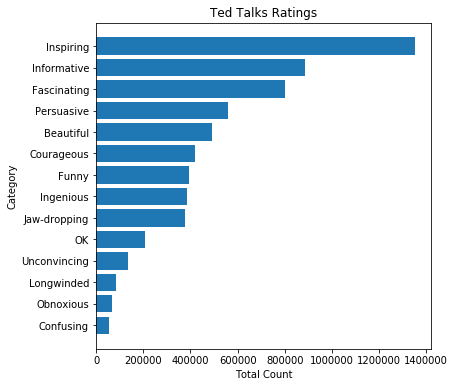

In [24]:
fig, ax = plt.subplots(figsize = (6,6))

ax.barh(talk_ratings_agg['rating'], talk_ratings_agg['count'])
ax.set_title('Ted Talks Ratings')
ax.set_ylabel('Category')
ax.set_xlabel('Total Count')

Inspiring stands out as a rating for Ted Talks. 

In [25]:
# 8 most viewed occupations - we will use it to get the ratio of ratings for each
most_views = df_ted[['views', 'speaker_occupation']].groupby(
    ['speaker_occupation']).agg(sum).sort_values(
    by = 'views', ascending = False).head(8).reset_index(drop = False)['speaker_occupation'].tolist()

# 8 least viewed occupations - we will use it to get the ratio of ratings for each
least_views = df_ted[['views', 'speaker_occupation']].groupby(
    ['speaker_occupation']).agg(sum).sort_values(
    by = 'views', ascending = True).head(8).reset_index(drop = False)['speaker_occupation'].tolist()

list_of_occupations = most_views + least_views # appending lists

#subsetting talks using the occupations in the list
df_ratings_analysis = df_ted[df_ted['speaker_occupation'].isin(
    list_of_occupations)][['title','speaker_occupation','views']]

# creating dataframe with occupation, rating and count of rating
df_ratings_analysis = pd.merge(df_ratings_analysis,
                    df_talk_ratings,
                    on = 'title')

df_ratings_analysis_tags = pd.merge(df_ratings_analysis,
                    df_ratings,
                    on = 'id',
                    how = 'left')[['speaker_occupation', 'views', 'count', 'rating']]

df_rat_occ_sum = df_ratings_analysis_tags[['speaker_occupation', 'count', 'rating']].groupby(
    ['speaker_occupation', 'rating']).agg(sum)

df_rat_occ_running_total_sum = df_rat_occ_sum.groupby(level=0).agg(sum) # calculating sum of total per occupation
df_occupation_rating_percent = df_rat_occ_sum.div(df_rat_occ_running_total_sum, level=0) * 100 # calculating percentage

In [33]:
#most views
ratings_most_views = df_ted[df_ted['speaker_occupation'].isin(
    most_views)][['title','speaker_occupation','views']]

# creating dataframe with occupation, rating and count of rating
ratings_most_views2 = pd.merge(ratings_most_views,
                    df_talk_ratings,
                    on = 'title')

ratings_most_views3 = pd.merge(ratings_most_views2,
                    df_ratings,
                    on = 'id',
                    how = 'left')[['speaker_occupation', 'views', 'count', 'rating']]

ratings_most_views4 = ratings_most_views3[['speaker_occupation', 'count', 'rating']].groupby(
    ['speaker_occupation', 'rating']).agg(sum)

ratings_most_views5 = ratings_most_views4.groupby(level=0).agg(sum) # calculating sum of total per occupation
ratings_most_views6 = ratings_most_views4.div(ratings_most_views5, level=0) * 100 # calculating percentage

count
speaker_occupation rating                 
Author/educator    Beautiful      4.856285
                   Confusing      0.231642
                   Courageous     3.614655
                   Fascinating   11.213401
                   Funny         18.441967
...                                    ...
Writer             Longwinded     1.618541
                   OK             4.238368
                   Obnoxious      1.243863
                   Persuasive     7.272621
                   Unconvincing   2.575403

[112 rows x 1 columns]

In [34]:
#least views
ratings_least_views = df_ted[df_ted['speaker_occupation'].isin(
    least_views)][['title','speaker_occupation','views']]

# creating dataframe with occupation, rating and count of rating
ratings_least_views2 = pd.merge(ratings_least_views,
                    df_talk_ratings,
                    on = 'title')

ratings_least_views3 = pd.merge(ratings_least_views2,
                    df_ratings,
                    on = 'id',
                    how = 'left')[['speaker_occupation', 'views', 'count', 'rating']]

ratings_least_views4 = ratings_least_views3[['speaker_occupation', 'count', 'rating']].groupby(
    ['speaker_occupation', 'rating']).agg(sum)

ratings_least_views5 = ratings_least_views4.groupby(level=0).agg(sum) # calculating sum of total per occupation
ratings_least_views6 = ratings_least_views4.div(ratings_least_views5, level=0) * 100 # calculating percentage
ratings_least_views6

count
speaker_occupation   rating                 
Civic thought leader Beautiful      5.045872
                     Confusing      3.363914
                     Courageous     1.987768
                     Fascinating    4.892966
                     Funny          3.058104
...                                      ...
physicist            Longwinded     2.236842
                     OK             5.394737
                     Obnoxious      3.815789
                     Persuasive    10.263158
                     Unconvincing   1.842105

[112 rows x 1 columns]

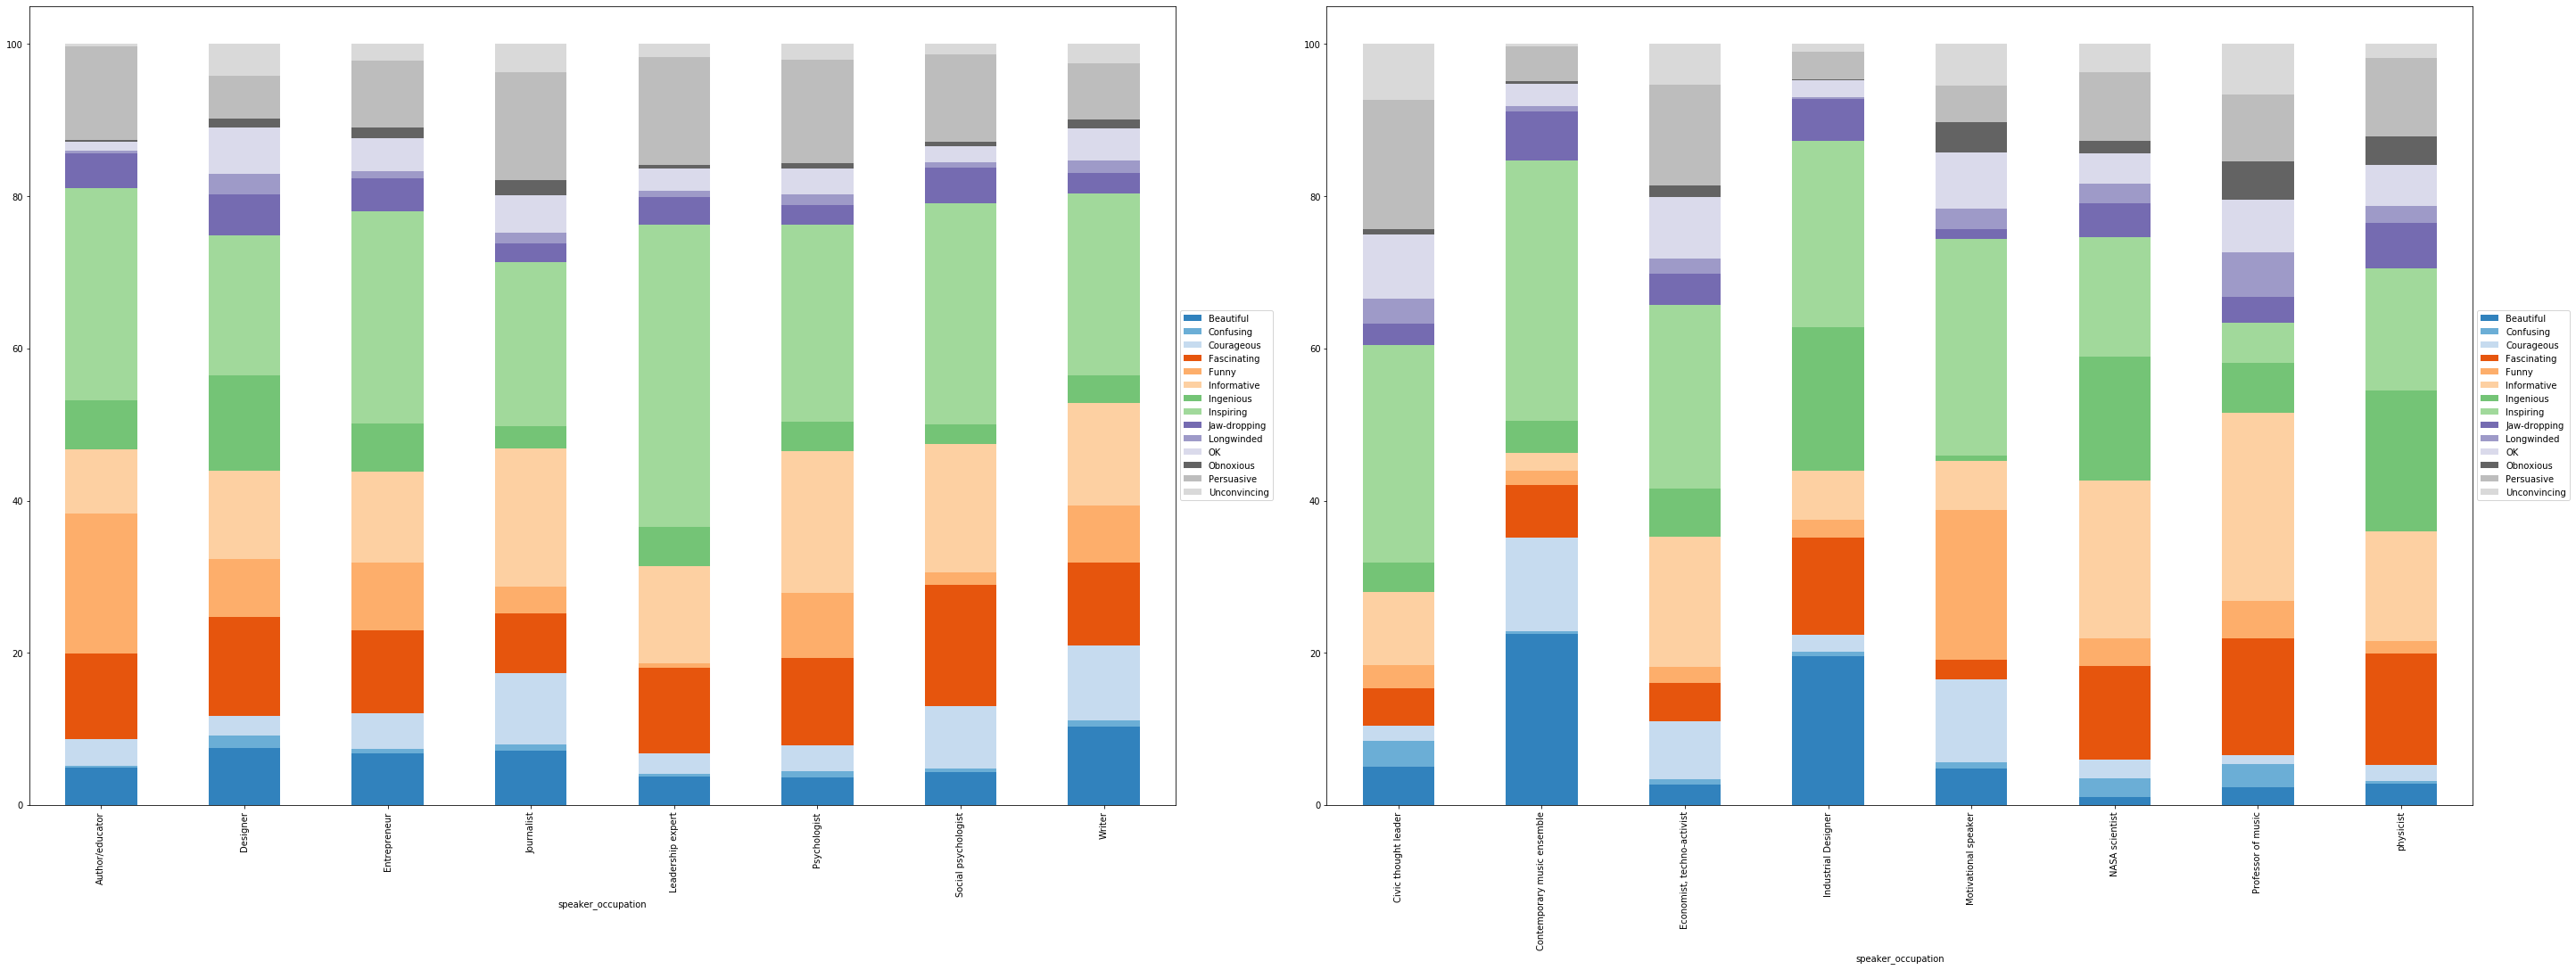

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(40, 40), constrained_layout=True)

# Tags with most views
occ_rating_plot1 = ratings_most_views6.reset_index(drop = False).reset_index(drop = True)
occ_rating_plot1 = occ_rating_plot1.pivot(index = 'speaker_occupation', columns = 'rating')
occ_rating_plot1.columns = occ_rating_plot1.columns.droplevel(0)
occ_rating_plot1 = occ_rating_plot1.reset_index(drop = False)
occ_rating_plot1 = occ_rating_plot1.set_index('speaker_occupation')

# Tags with least views
occ_rating_plot2 = ratings_least_views6.reset_index(drop = False).reset_index(drop = True)
occ_rating_plot2 = occ_rating_plot2.pivot(index = 'speaker_occupation', columns = 'rating')
occ_rating_plot2.columns = occ_rating_plot2.columns.droplevel(0)
occ_rating_plot2 = occ_rating_plot2.reset_index(drop = False)
occ_rating_plot2 = occ_rating_plot2.set_index('speaker_occupation')

occ_rating_plot1.plot(kind='bar', ax = ax1, stacked=True, colormap='tab20c', figsize=(40,15)).legend(
    loc='center left', bbox_to_anchor=(1, 0.5))

occ_rating_plot2.plot(kind='bar', ax = ax2, stacked=True, colormap='tab20c', figsize=(40,15)).legend(
    loc='center left', bbox_to_anchor=(1, 0.5))

Visualisation: Most viewed speaker occupations on the right - Least viewed on the left. The visualisation is showing the breakdown of rating categories as a stacked bar. It is hard to draw meaningful conclusions here, it seems that the grey area at the top (which are negative ratings) is on average bigger for the occupations with less views. However, the variance across the board is to big.

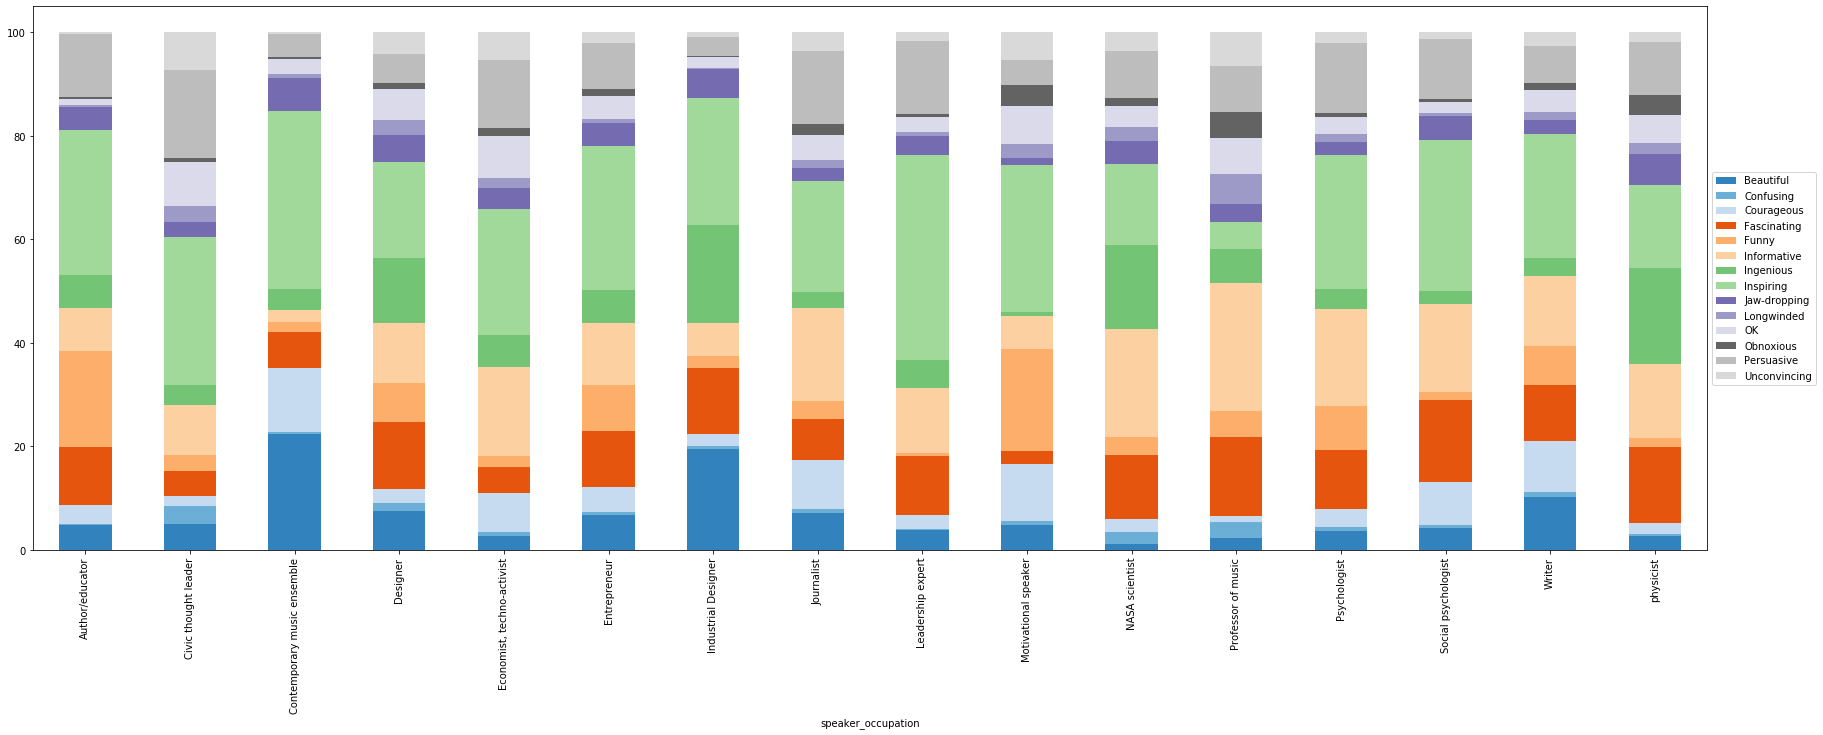

In [122]:
## All Occupations Together
occ_rating_plot = df_occupation_rating_percent.reset_index(drop = False).reset_index(drop = True)
occ_rating_plot = occ_rating_plot.pivot(index = 'speaker_occupation', columns = 'rating')
occ_rating_plot.columns = occ_rating_plot.columns.droplevel(0)
occ_rating_plot = occ_rating_plot.reset_index(drop = False)
occ_rating_plot = occ_rating_plot.set_index('speaker_occupation')

occ_rating_plot.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(30,10)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

If we want to understand what features make Ted Talks the most succesfull we need to isolate the videos on the right tail of the distribution. For this analysis I have selected the 95 percentile.

In [123]:
#Analysis on the tail - are there any commonalities to the most watched Ted Talks?
nine_five_percentile = round(np.percentile(df_ted['views'], 95),0)
df_right_tail = df_ted[df_ted['views'] > nine_five_percentile]

Text(0, 0.5, 'Occupation')

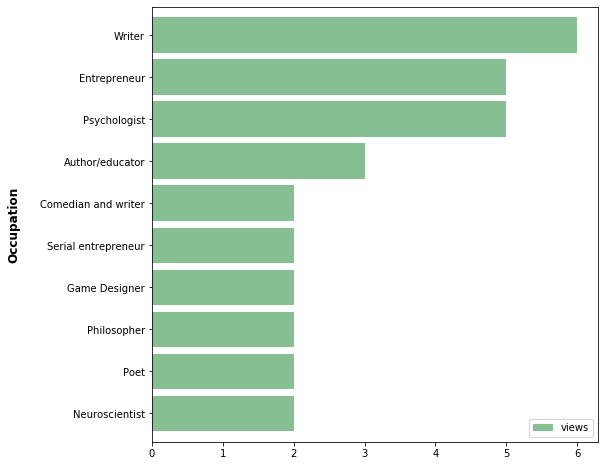

In [124]:
#### EDA - Exploratory Data Analysis

## Occupations of speakers
df_right_tail = df_right_tail[['speaker_occupation', 'views']].groupby(['speaker_occupation']).agg(
    'count').sort_values(by = 'views', ascending = False).head(10).reset_index(drop = False)
## plot
ax = df_right_tail.sort_values(by = 'views').plot(x = 'speaker_occupation', y = 'views',
    kind='barh', figsize=(8, 8), color='#86bf91', zorder=2, width=0.85)

ax.set_ylabel("Occupation", labelpad=20, weight='bold', size=12)

When we look at the 95 percentile of the distribution. Writers, Entrepreneurs and Psychologists retain their places as the most viewed occupations.

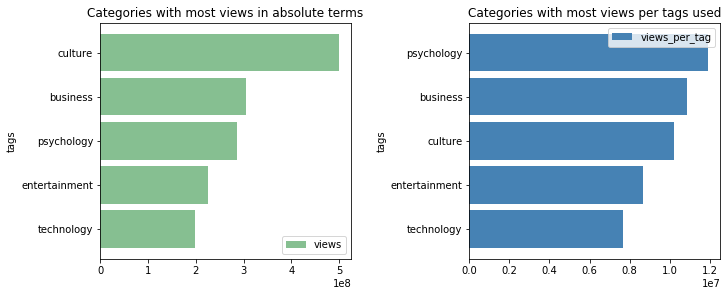

In [125]:
# Tags analysis on the tail
df_right_tail = df_ted[df_ted['views'] > nine_five_percentile]
df_tags_tail = df_ted_tags[['title', 'tags']]
df_tags_tail = pd.merge(df_tags_tail,
                         df_right_tail[['title','views']],
                         how = 'right',
                         on = 'title')

df_tags_tail = df_tags_tail.groupby(['tags']).agg(
        {'title': 'count',
         'views': sum}).sort_values(
        by = 'title', ascending = False).reset_index(drop = False)
 
df_tags_tail = df_tags_tail.head(5)         
df_tags_tail = df_tags_tail.assign(views_per_tag = 
                                     pd.to_numeric(df_tags_tail.views)/ pd.to_numeric(df_tags_tail.title))

df_tags_tail['views_per_tag'] = df_tags_tail['views_per_tag'].apply(lambda x: '{:.2f}'.format(x)) # no scientific notation
df_tags_tail.views_per_tag = pd.to_numeric(df_tags_tail.views_per_tag) #conversion to numeric

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(40, 40), constrained_layout=True)
# Tags with most views
df_tags_tail.sort_values('views', inplace = True) #ordering desc
df_tags_tail.plot(x = 'tags', y = 'views', title = "Categories with most views in absolute terms",
                   kind = 'barh', ax = ax1, color='#86bf91', zorder=2, width=0.85)

# Tags with most views standardised (views per tag ratio)
df_tags_tail.sort_values('views_per_tag', inplace = True) #ordering desc
df_tags_tail.plot(x = 'tags', y = 'views_per_tag', title = "Categories with most views per tags used",
                   kind = 'barh', figsize=(10, 4), ax = ax2, color='#4682B4', zorder=2, width=0.85)

On the tags side of things, business emerges as one of the tags with more views under the right tail. The rest of the categories keep their place at the top barring some changes in position. We can conclude that the characteristics of the most viewed Talks don't differ from the big population as a whole.

In [ ]:
## For each Ted Talk do the % distribution of rating categories

In [ ]:
## Relationship between the occupation and the ratings (confusing, fun, etc.)

In [ ]:
## Create good, bad, neutral categories - maybe score them